In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn import linear_model

In [7]:
df = pd.read_csv("DatosSoft.csv",sep=";")
df

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


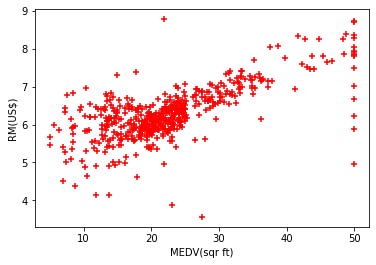

In [8]:
%matplotlib inline
plt.xlabel('MEDV(sqr ft)')
plt.ylabel('RM(US$)')
plt.scatter (df.MEDV,df.RM, color='red',marker='+')

In [16]:
# Para la matriz 2D y la proporcion de los datos en el numero promedio de habitaciones
regresion = linear_model.LinearRegression()
regresion.fit(df[['MEDV']],df.RM)

LinearRegression()

In [17]:
# Predecimos el el numero promedio de habitaciones por vivienda , con respecto al valor mediano de las viviendas ocupadas es 25.0
regresion.predict([[25.0]])
# por lo tanto, el numero promedio de habitaciones es:

array([6.41629939])

In [18]:
#El coeficiente que es este m ==> Y= mx + b
regresion.coef_

array([0.05328094])

In [19]:
#Pendiente e interseccion representado por b ==> Y= mx + b
regresion.intercept_

5.084275831867604

In [13]:
# Para Y
# Y= mx + b , reemplazando tenemos:
0.05328094*25.0+5.084275831867604

6.416299331867604

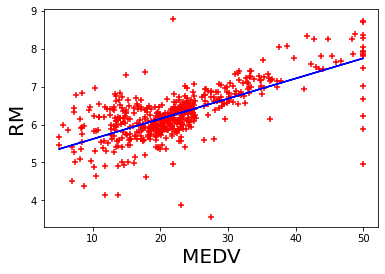

In [20]:
# Y= mx + b
%matplotlib inline
plt.xlabel('MEDV', fontsize=20)
plt.ylabel('RM', fontsize=20)
plt.scatter (df.MEDV,df.RM, color='red',marker='+')
plt.plot(df.MEDV,regresion.predict(df[['MEDV']]),color='blue')

In [21]:
import pickle

In [22]:
with open('regresion_pickle','wb') as f:
    pickle.dump(regresion,f)

In [23]:
with open('regresion_pickle','rb') as f:
    mp = pickle.load(f)

In [24]:
mp.predict([[25.0]])

array([6.41629939])

In [25]:
import joblib

In [26]:
joblib.dump(regresion,'regresion_joblib')

['regresion_joblib']

In [27]:
mj = joblib.load('regresion_joblib')

In [28]:
mj.predict([[25.0]])

array([6.41629939])

In [29]:
mj.coef_

array([0.05328094])

In [30]:
mj.intercept_

5.084275831867604